In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv("data/advertising.csv")
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


**What types of data are in the dataset?**

In [10]:
data.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

I will be creating ML model only with numerical data. All of string values are unique and cannot be categorized.

**How is the age of users distributed?**

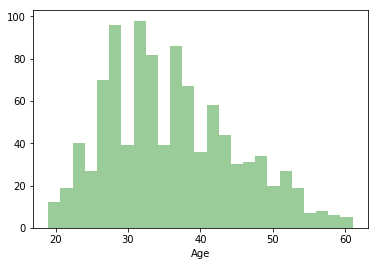

In [19]:
sns.distplot(data["Age"], bins=25, color="g", kde=False)

There seems to be a huge drop in the amount of users when the age is greater than 42. Otherwise, the distribution of age is more or less normal.

**How is the area income distributed?**

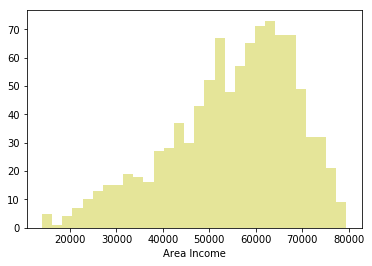

In [21]:
sns.distplot(data["Area Income"], bins=30, kde=False, color="y")

It's quite skewed, most of the users come from the area with higher income.

**Is there a trend with regards of "Daily time spent on site" and "Daily Internet usage"?**



The correlation of 'Daily Internet Usage' and 'Daily Time Spent on Site': 0.52




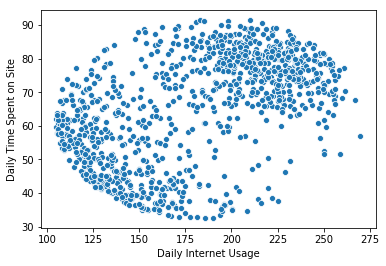

In [29]:
print("\n")
print("The correlation of 'Daily Internet Usage' and 'Daily Time Spent on Site': {:.2f}".format(data["Daily Internet Usage"].corr(data["Daily Time Spent on Site"])))
print("\n")
sns.scatterplot(x="Daily Internet Usage", y="Daily Time Spent on Site", data=data)

Not really.

Okay, now I will split the data into training and test.

### Train/Test Split

In [5]:
from sklearn.model_selection import train_test_split

X = data[["Daily Time Spent on Site", "Age", "Area Income", "Daily Internet Usage", "Male"]]
y = data["Clicked on Ad"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

I will now import Random Forest Classifier and train it.

In [6]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

C:\Users\Dario\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [7]:
predictions = rfc.predict(X_test)

I can now get the models accuracy:

In [8]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       127
           1       0.97      0.95      0.96       123

   micro avg       0.96      0.96      0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



Model is pretty good! I've tested it before with Logistic Regression and got 91%, so Random Forest works better for this case.

In [9]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predictions))

[[124   3]
 [  6 117]]


Of the test data, 124 were classified as "Not clicked" and 3 were false positives. 117 were classified as "Clicked" with 6 missclassifications.